In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
x = pd.read_pickle("./test5.pkl")
y = pd.read_pickle("./test5y.pkl")
Test = pd.read_pickle("./test_set.pkl")

In [32]:
num = x.select_dtypes(include = [np.number])

In [33]:
num.reset_index(inplace = True)
num

,index,Id,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,SalePrice
0,0,1,65.0,9.041922,1,7,5,9,9,196.0,...,2,548,3,0,61,0,0,0,4,208500
1,1,2,80.0,9.169518,1,6,8,36,36,0.0,...,2,460,3,298,0,0,0,0,5,181500
2,2,3,68.0,9.328123,1,7,5,11,10,162.0,...,2,608,3,0,42,0,0,0,4,223500
3,3,4,60.0,9.164296,1,7,5,97,42,0.0,...,3,642,3,0,35,272,0,0,6,140000
4,4,5,84.0,9.565214,1,8,5,12,12,350.0,...,3,836,3,192,84,0,0,0,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1455,1456,62.0,8.976768,1,6,5,13,12,0.0,...,2,460,3,0,40,0,0,0,5,175000
1184,1456,1457,85.0,9.486076,1,6,6,34,24,119.0,...,2,500,3,349,0,0,0,0,2,210000
1185,1457,1458,66.0,9.109636,1,7,9,71,6,0.0,...,1,252,3,0,60,0,0,0,2,266500
1186,1458,1459,68.0,9.181632,1,5,6,62,16,0.0,...,1,240,3,366,0,112,0,0,2,142125


In [34]:
num = num.drop(['index', 'Id'], axis =1)
num

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,SalePrice
0,65.0,9.041922,1,7,5,9,9,196.0,4,3,...,2,548,3,0,61,0,0,0,4,208500
1,80.0,9.169518,1,6,8,36,36,0.0,3,3,...,2,460,3,298,0,0,0,0,5,181500
2,68.0,9.328123,1,7,5,11,10,162.0,4,3,...,2,608,3,0,42,0,0,0,4,223500
3,60.0,9.164296,1,7,5,97,42,0.0,3,3,...,3,642,3,0,35,272,0,0,6,140000
4,84.0,9.565214,1,8,5,12,12,350.0,4,3,...,3,836,3,192,84,0,0,0,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,62.0,8.976768,1,6,5,13,12,0.0,3,3,...,2,460,3,0,40,0,0,0,5,175000
1184,85.0,9.486076,1,6,6,34,24,119.0,3,3,...,2,500,3,349,0,0,0,0,2,210000
1185,66.0,9.109636,1,7,9,71,6,0.0,5,4,...,1,252,3,0,60,0,0,0,2,266500
1186,68.0,9.181632,1,5,6,62,16,0.0,3,3,...,1,240,3,366,0,112,0,0,2,142125


In [35]:
#Gradient Boosting Models
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

#store the encoded column values in seperate variables
#we will join them together later!

zoning_labels      = lencoder.fit_transform(x.MSZoning).reshape((-1,1))
subclass_labels = lencoder.fit_transform(x.MSSubClass).reshape((-1,1))
mosold_labels    = lencoder.fit_transform(x.MoSold).reshape((-1,1))
alley_labels    = lencoder.fit_transform(x.Alley).reshape((-1,1))
lotshape_labels= lencoder.fit_transform(x.LotShape).reshape((-1,1))
lcont_labels = lencoder.fit_transform(x.LandContour).reshape((-1,1))
lconfig_labels = lencoder.fit_transform(x.LotConfig).reshape((-1,1))
btype_labels = lencoder.fit_transform(x.BldgType).reshape((-1,1))
cond_labels = lencoder.fit_transform(x.Condition1).reshape((-1,1))
hstyle_labels = lencoder.fit_transform(x.HouseStyle).reshape((-1,1))
rstyle_labels = lencoder.fit_transform(x.RoofStyle).reshape((-1,1))
hood_labels = lencoder.fit_transform(x.Neighborhood).reshape((-1,1))
x1st_labels = lencoder.fit_transform(x.Exterior1st).reshape((-1,1))
x2nd_labels = lencoder.fit_transform(x.Exterior2nd).reshape((-1,1))
mvnr_labels = lencoder.fit_transform(x.MasVnrType).reshape((-1,1))
bfintype_labels = lencoder.fit_transform(x.BsmtFinType1).reshape((-1,1))
func_labels = lencoder.fit_transform(x.Functional).reshape((-1,1))
gtype_labels = lencoder.fit_transform(x.GarageType).reshape((-1,1))
gfin_labels = lencoder.fit_transform(x.GarageFinish).reshape((-1,1))
pdrive_labels = lencoder.fit_transform(x.PavedDrive).reshape((-1,1))
fnce_lables = lencoder.fit_transform(x.Fence).reshape((-1,1))
stype_labels = lencoder.fit_transform(x.SaleType).reshape((-1,1))
scond_labels = lencoder.fit_transform(x.SaleCondition).reshape((-1,1))
found_labels = lencoder.fit_transform(x.Foundation).reshape((-1,1))
electric_labels = lencoder.fit_transform(x.Electrical).reshape((-1,1))


priceFeatures = np.concatenate((zoning_labels, subclass_labels, mosold_labels, alley_labels, lotshape_labels, lcont_labels,
                               lconfig_labels, btype_labels, cond_labels, hstyle_labels, rstyle_labels, hood_labels, x1st_labels,
                               x2nd_labels, mvnr_labels, bfintype_labels, func_labels, gtype_labels, gfin_labels, pdrive_labels,
                               fnce_lables, stype_labels, scond_labels, found_labels,
                                electric_labels), axis = 1)

columnNames = ['Zoning', 'SubClass', 'MonthSold', 'Alley', 'LotShape', 'LContour', 'LandConfig', 'Building Type', 'Condition',
              'HouseStyle', 'RoofStyle', 'Neighborhood', 'exterior1st', 'exterior2nd', 'MassVnrType', 'BsmtFinish', 'Functional', 
               'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCond', 'Foundation', 'Electricity']
priceFeatures = pd.DataFrame(priceFeatures, columns = columnNames)
priceFeatures = pd.concat([priceFeatures, num], axis = 1)
priceFeatures.drop('SalePrice', axis = 1, inplace = True)
gbmr = GradientBoostingRegressor()
gbmr.fit(priceFeatures, y)
gbmr.score(priceFeatures, y)

0.9642074639519053

In [36]:
priceFeatures

,Zoning,SubClass,MonthSold,Alley,LotShape,LContour,LandConfig,Building Type,Condition,HouseStyle,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold
0,3,5,1,1,3,3,4,0,2,5,...,9,2,548,3,0,61,0,0,0,4
1,3,0,4,1,3,3,2,0,1,2,...,36,2,460,3,298,0,0,0,0,5
2,3,5,8,1,0,3,4,0,2,5,...,11,2,608,3,0,42,0,0,0,4
3,3,6,1,1,0,3,0,0,2,5,...,14,3,642,3,0,35,272,0,0,6
4,3,5,11,1,0,3,2,0,2,5,...,12,3,836,3,192,84,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,3,5,7,1,3,3,4,0,2,5,...,13,2,460,3,0,40,0,0,0,5
1184,3,0,1,1,3,3,4,0,2,2,...,34,2,500,3,349,0,0,0,0,2
1185,3,6,4,1,3,3,4,0,2,5,...,71,1,252,3,0,60,0,0,0,2
1186,3,0,3,1,3,3,4,0,2,2,...,62,1,240,3,366,0,112,0,0,2


In [37]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)
gbmr.set_params(learning_rate = 0.1, n_estimators=n_estimators, max_depth=3)
gbmr.fit(priceFeatures, y)
gen = gbmr.staged_predict(priceFeatures)
r2_rate01 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate01.append(r2_score(y, predicted_targets))     

In [38]:
gbmr.set_params(learning_rate = 0.01)
gbmr.fit(priceFeatures, y)
gen = gbmr.staged_predict(priceFeatures)
r2_rate001 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate001.append(r2_score(y, predicted_targets))     

In [39]:
gbmr.set_params(learning_rate = 0.001)
gbmr.fit(priceFeatures, y)
gen = gbmr.staged_predict(priceFeatures)
r2_rate0001 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate0001.append(r2_score(y, predicted_targets)) 

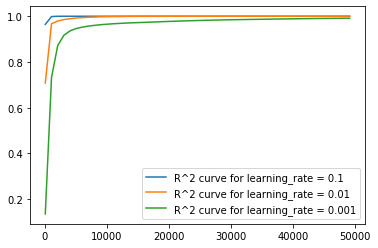

In [40]:
plt.plot(steps, r2_rate01, label=r'R^2 curve for learning_rate = 0.1')
plt.plot(steps, r2_rate001, label=r'R^2 curve for learning_rate = 0.01')
plt.plot(steps, r2_rate0001, label = r'R^2 curve for learning_rate = 0.001' )
plt.legend(loc=4)

In [41]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbmr.set_params(learning_rate = .01, n_estimators=n_estimators, max_depth=3)
gbmr.fit(priceFeatures, y)
gen = gbmr.staged_predict(priceFeatures)
r2_depth3 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_depth3.append(r2_score(y, predicted_targets)) 

In [42]:
gbmr.set_params(learning_rate = 0.01, max_depth = 5)
    
gbmr.fit(priceFeatures, y)
gen = gbmr.staged_predict(priceFeatures)
r2_maxdepth3 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth3.append(r2_score(y, predicted_targets))  
        

In [43]:
gbmr.set_params(learning_rate = 0.01, max_depth = 10)
    
gbmr.fit(priceFeatures, y)
gen = gbmr.staged_predict(priceFeatures)
r2_maxdepth10 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth10.append(r2_score(y, predicted_targets))   

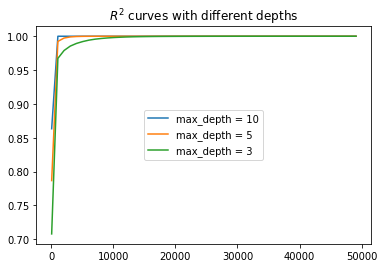

In [44]:
plt.plot(steps, r2_maxdepth10, label = 'max_depth = 10')
plt.plot(steps, r2_maxdepth3, label='max_depth = 5')
plt.plot(steps, r2_depth3, label='max_depth = 3')
plt.title('$R^2$ curves with different depths')
plt.legend(loc=10)

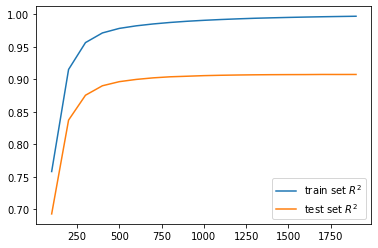

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
X_train, X_test, Y_train, Y_test = train_test_split(priceFeatures, y, test_size=0.3)

n_estimators = 50100

gbmr.set_params(learning_rate=0.01, max_depth=5, n_estimators=n_estimators)
train_r2 = []
test_r2  = []
steps = range(100,2000,100)
#fit on training data
gbmr.fit(X_train, Y_train)


gen_train = gbmr.staged_predict(X_train)
gen_test  = gbmr.staged_predict(X_test)

for n in range(n_estimators):
           predicted_train = next(gen_train)
           predicted_test  = next(gen_test)
           if n not in steps: continue
           train_r2.append(r2_score(Y_train, predicted_train))
           test_r2.append(r2_score(Y_test, predicted_test))  
            
plt.plot(steps, train_r2, label='train set $R^2$')
plt.plot(steps, test_r2, label='test set $R^2$')
plt.legend(loc=4)

In [76]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
X_train, X_test, Y_train, Y_test = train_test_split(priceFeatures, y, test_size=0.3)
gbmr.set_params(learning_rate=0.01, max_depth=5, n_estimators= 800)
gbmr.fit(X_train, Y_train)
pred = gbmr.predict(X_test)
r2_score(pred, Y_test)
#np.sqrt(mse(pred, Y_test))

0.8806020847120637

In [47]:
featimp = gbmr.feature_importances_

In [48]:
sorted_importance = sorted(zip(priceFeatures.columns.values, gbmr.feature_importances_), key=lambda t:t[1], reverse=True) 
#gbmr.feature_importances_
sorted_importance

[('OverallQual', 0.5262751236678213),
 ('GrLivArea', 0.09431513570660625),
 ('Neighborhood', 0.08669461956572369),
 ('TotalBsmtSF', 0.042766208752070774),
 ('GarageCars', 0.030799687423692743),
 ('YearBuilt', 0.029843540146459575),
 ('1stFlrSF', 0.021597765325740717),
 ('GarageArea', 0.017761099605530344),
 ('LotArea', 0.01525718206568607),
 ('FireplaceQu', 0.01311696629821192),
 ('KitchenQual', 0.012736777673490147),
 ('OverallCond', 0.008279618531767235),
 ('YearRemodAdd', 0.008023018226381764),
 ('CentralAir', 0.0077343075362442965),
 ('ExterCond', 0.006521836858388776),
 ('BsmtUnfSF', 0.005463086382671351),
 ('GarageType', 0.0049309278239652995),
 ('BsmtQual', 0.00476929208139327),
 ('Zoning', 0.004378460540437237),
 ('WoodDeckSF', 0.00409003886260096),
 ('2ndFlrSF', 0.003963695456368089),
 ('BsmtFinish', 0.0039019608453688633),
 ('SaleCond', 0.003523454818776348),
 ('Fence', 0.002939438840752342),
 ('BsmtFullBath', 0.002817551784217976),
 ('LotFrontage', 0.0025571628621141418),
 (

In [49]:
imp_features = sorted_importance[:15]

Text(0.5, 1.0, 'Feature Importance Plot of 800-Tree GBM')

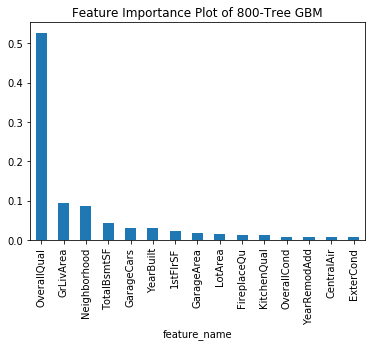

In [50]:
#sorted_importance = sorted(zip(columnNames, gbmr.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*imp_features) 
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 800-Tree GBM')

In [51]:
important_features = []
for feature in imp_features: 
    important_features.append(feature[0])
important_features

['OverallQual',
 'GrLivArea',
 'Neighborhood',
 'TotalBsmtSF',
 'GarageCars',
 'YearBuilt',
 '1stFlrSF',
 'GarageArea',
 'LotArea',
 'FireplaceQu',
 'KitchenQual',
 'OverallCond',
 'YearRemodAdd',
 'CentralAir',
 'ExterCond']

In [52]:
ipriceFeatures = priceFeatures[important_features]
gbmr.fit(ipriceFeatures, y)
gbmr.score(ipriceFeatures, y)

0.9785270669284066

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(ipriceFeatures, y, test_size=0.3)
gbmr.set_params(learning_rate=0.01, max_depth=5, n_estimators= 1500, max_features = 4, min_samples_split = 10, subsample = 0.8)
gbmr.fit(X_train, Y_train)
pred = gbmr.predict(X_test)
r2_score(pred, Y_test)
np.sqrt(mse(pred, Y_test))

0.12001060084886919

In [92]:
from sklearn.model_selection import GridSearchCV
paramgrid = {
    'learning_rate': [0.01, .1],
    'max_depth' : [5,10],
    'max_features' : [4,5],
    'min_samples_split': [5,10],
    'subsample': [.8, .9],
    'n_estimators': [500, 800, 1000]
}
grid_search = GridSearchCV(estimator = gbmr, param_grid = paramgrid)
grid_search.fit(priceFeatures, y)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [84]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 10,
 'n_estimators': 1000,
 'subsample': 0.8}

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(priceFeatures, y, test_size=0.3)
gbmr.set_params(learning_rate=0.01, max_depth=5, n_estimators= 1500, max_features = 4, min_samples_split = 10, subsample = 0.8)
gbmr.fit(X_train, Y_train)
pred = gbmr.predict(X_test)
r2_score(pred, Y_test)
np.sqrt(mse(pred, Y_test))

0.11218347492861429

In [57]:
Test1 = Test[['OverallQual', 'GrLivArea', 'Neighborhood', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'GarageArea', 'LotArea', 'YearRemodAdd', 
    'GarageCars', 'YearBuilt', 'OverallCond', 'CentralAir', 'BsmtQual', 'BsmtFinType1', 'Id']]
Test1['BsmtFinish'] = Test['BsmtFinType1']
Test1

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OverallQual,GrLivArea,Neighborhood,TotalBsmtSF,1stFlrSF,KitchenQual,GarageArea,LotArea,YearRemodAdd,GarageCars,YearBuilt,OverallCond,CentralAir,BsmtQual,BsmtFinType1,Id,BsmtFinish
0,5,896,Band_3,882.0,896,3,730.0,9.360655,51,1.0,51,6,1,3,Rec,1461,Rec
1,6,1329,Band_3,1329.0,1329,4,312.0,9.565704,54,1.0,54,6,1,3,ALQ,1462,ALQ
2,5,1629,Band_4,928.0,928,3,482.0,9.534595,14,2.0,15,5,1,4,GLQ,1463,GLQ
3,6,1604,Band_4,926.0,926,4,470.0,9.208138,14,2.0,14,6,1,3,GLQ,1464,GLQ
4,8,1280,Band_6,1280.0,1280,4,506.0,8.518193,20,2.0,20,5,1,4,ALQ,1465,ALQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,Band_1,546.0,546,3,0.0,7.568379,42,0.0,42,7,1,3,Unf,2915,Unf
1455,4,1092,Band_1,546.0,546,3,286.0,7.546446,42,1.0,42,5,1,3,Rec,2916,Rec
1456,5,1224,Band_3,1224.0,1224,3,576.0,9.903488,16,2.0,52,7,1,3,ALQ,2917,ALQ
1457,5,970,Band_3,912.0,970,3,0.0,9.253496,20,0.0,20,5,1,4,GLQ,2918,GLQ


In [58]:
#Gradient Boosting Models


lencoder = LabelEncoder()


thood_labels = lencoder.fit_transform(Test1.Neighborhood).reshape((-1,1))
tbsmtfin_labels = lencoder.fit_transform(Test1.BsmtFinish).reshape((-1,1))


tpriceFeatures = np.concatenate((thood_labels, tbsmtfin_labels), axis = 1)

Testnum = Test1
Testnum.drop(['Neighborhood', 'BsmtFinish', 'BsmtFinType1', 'Id'], axis = 1, inplace = True)

tpriceFeatures = pd.DataFrame(tpriceFeatures)
tpriceFeatures.columns = ['Neighborhood', 'BsmtFinish']
tpriceFeatures = pd.concat([tpriceFeatures, Testnum], axis = 1)

#gbmr.fit(priceFeatures, y)


C:\Users\david\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
gbmr.set_params(learning_rate=0.01, max_depth=5, n_estimators= 1500, max_features = 4, min_samples_split = 10, subsample = 0.8)
gbmr.fit(ipriceFeatures, y)
pred = gbmr.predict(tpriceFeatures)


In [97]:
pred = np.exp(pred)

In [101]:
Test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SaleCond
0,1461,20,RH,80.0,9.360655,NoAlley,Reg,Lvl,Inside,1,...,0,0,120,0,MnPrv,6,2,WD,Normal,Normal
1,1462,20,RL,81.0,9.565704,NoAlley,IR1,Lvl,Corner,1,...,36,0,0,0,NoFence,6,2,WD,Normal,Normal
2,1463,60,RL,74.0,9.534595,NoAlley,IR1,Lvl,Inside,1,...,34,0,0,0,MnPrv,3,2,WD,Normal,Normal
3,1464,60,RL,78.0,9.208138,NoAlley,IR1,Lvl,Inside,1,...,36,0,0,0,NoFence,6,2,WD,Normal,Normal
4,1465,120,RL,43.0,8.518193,NoAlley,IR1,HLS,Inside,1,...,82,0,144,0,NoFence,1,2,WD,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,7.568379,NoAlley,Reg,Lvl,Inside,1,...,0,0,0,0,NoFence,6,6,WD,Normal,Normal
1455,2916,160,RM,21.0,7.546446,NoAlley,Reg,Lvl,Inside,1,...,24,0,0,0,NoFence,4,6,WD,Abnorml,Abnorml
1456,2917,20,RL,160.0,9.903488,NoAlley,Reg,Lvl,Inside,1,...,0,0,0,0,NoFence,9,6,WD,Abnorml,Abnorml
1457,2918,85,RL,62.0,9.253496,NoAlley,Reg,Lvl,Inside,1,...,32,0,0,0,MnPrv,7,6,WD,Normal,Normal


In [98]:
pred = pd.DataFrame(pred, columns = ['SalePrice'])

In [102]:
Id = Test['Id']
Id = pd.DataFrame(Id, columns = ['Id'])
predT = pd.concat([Id, pred], axis = 1)

In [64]:
predT

,Id,SalePrice
0,1461,124958.688258
1,1462,134176.242471
2,1463,144223.878463
3,1464,136862.466142
4,1465,138559.514792
...,...,...
1454,2915,105029.546229
1455,2916,111052.833309
1456,2917,139402.483231
1457,2918,116550.680362


In [103]:
predT.to_csv('Kaggle_Submission2.csv', index = False)

In [66]:
Tnum = Test.select_dtypes(include = [np.number])
Tnum.drop(['Id'], axis =1 , inplace = True)
Tnum

C:\Users\david\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold
0,80.0,9.360655,1,5,6,51,51,0.0,3,3,...,51,1.0,730.0,3,140,0,0,120,0,2
1,81.0,9.565704,1,6,6,54,54,108.0,3,3,...,54,1.0,312.0,3,393,36,0,0,0,2
2,74.0,9.534595,1,5,5,15,14,0.0,3,3,...,15,2.0,482.0,3,212,34,0,0,0,2
3,78.0,9.208138,1,6,6,14,14,20.0,3,3,...,14,2.0,470.0,3,360,36,0,0,0,2
4,43.0,8.518193,1,8,5,20,20,0.0,4,3,...,20,2.0,506.0,3,0,82,0,144,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,7.568379,1,4,7,42,42,0.0,3,3,...,34,0.0,0.0,0,0,0,0,0,0,6
1455,21.0,7.546446,1,4,5,42,42,0.0,3,3,...,42,1.0,286.0,3,0,24,0,0,0,6
1456,160.0,9.903488,1,5,7,52,16,0.0,3,3,...,52,2.0,576.0,3,474,0,0,0,0,6
1457,62.0,9.253496,1,5,5,20,20,0.0,3,3,...,34,0.0,0.0,0,80,32,0,0,0,6


In [67]:
Test.select_dtypes(exclude = [np.number]).columns.values

array(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtFinType1', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence',
       'MoSold', 'SaleType', 'SaleCondition', 'SaleCond'], dtype=object)

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

Tzoning_labels      = lencoder.fit_transform(Test.MSZoning).reshape((-1,1))
Tsubclass_labels = lencoder.fit_transform(Test.MSSubClass).reshape((-1,1))
Tmosold_labels    = lencoder.fit_transform(Test.MoSold).reshape((-1,1))
Talley_labels    = lencoder.fit_transform(Test.Alley).reshape((-1,1))
Tlotshape_labels= lencoder.fit_transform(Test.LotShape).reshape((-1,1))
Tlcont_labels = lencoder.fit_transform(Test.LandContour).reshape((-1,1))
Tlconfig_labels = lencoder.fit_transform(Test.LotConfig).reshape((-1,1))
Tbtype_labels = lencoder.fit_transform(Test.BldgType).reshape((-1,1))
Tcond_labels = lencoder.fit_transform(Test.Condition1).reshape((-1,1))
Thstyle_labels = lencoder.fit_transform(Test.HouseStyle).reshape((-1,1))
Trstyle_labels = lencoder.fit_transform(Test.RoofStyle).reshape((-1,1))
Thood_labels = lencoder.fit_transform(Test.Neighborhood).reshape((-1,1))
Tx1st_labels = lencoder.fit_transform(Test.Exterior1st).reshape((-1,1))
Tx2nd_labels = lencoder.fit_transform(Test.Exterior2nd).reshape((-1,1))
Tmvnr_labels = lencoder.fit_transform(Test.MasVnrType).reshape((-1,1))
Tbfintype_labels = lencoder.fit_transform(Test.BsmtFinType1).reshape((-1,1))
Tfunc_labels = lencoder.fit_transform(Test.Functional).reshape((-1,1))
Tgtype_labels = lencoder.fit_transform(Test.GarageType).reshape((-1,1))
Tgfin_labels = lencoder.fit_transform(Test.GarageFinish).reshape((-1,1))
Tpdrive_labels = lencoder.fit_transform(Test.PavedDrive).reshape((-1,1))
Tfnce_lables = lencoder.fit_transform(Test.Fence).reshape((-1,1))
Tstype_labels = lencoder.fit_transform(Test.SaleType).reshape((-1,1))
Tscond_labels = lencoder.fit_transform(Test.SaleCondition).reshape((-1,1))
Tfound_labels = lencoder.fit_transform(Test.Foundation).reshape((-1,1))
Telectric_labels = lencoder.fit_transform(Test.Electrical).reshape((-1,1))


TpriceFeatures = np.concatenate((Tzoning_labels, Tsubclass_labels, Tmosold_labels, Talley_labels, Tlotshape_labels, Tlcont_labels,
                               Tlconfig_labels, Tbtype_labels, Tcond_labels, Thstyle_labels, Trstyle_labels, Thood_labels, Tx1st_labels,
                               Tx2nd_labels, Tmvnr_labels, Tbfintype_labels, Tfunc_labels, Tgtype_labels, Tgfin_labels, Tpdrive_labels,
                               Tfnce_lables, Tstype_labels, Tscond_labels, Tfound_labels, Telectric_labels), axis = 1)

columnNames = ['Zoning', 'SubClass', 'MonthSold', 'Alley', 'LotShape', 'LContour', 'LandConfig', 'Building Type', 'Condition',
              'HouseStyle', 'RoofStyle', 'Neighborhood', 'exterior1st', 'exterior2nd', 'MassVnrType', 'BsmtFinish', 'Functional', 
               'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCond', 'Foundation', 'Electricity']
TpriceFeatures = pd.DataFrame(TpriceFeatures, columns = columnNames)
TpriceFeatures = pd.concat([TpriceFeatures, Tnum], axis = 1)
TpriceFeatures

,Zoning,SubClass,MonthSold,Alley,LotShape,LContour,LandConfig,Building Type,Condition,HouseStyle,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold
0,2,0,5,1,3,3,4,0,1,2,...,51,1.0,730.0,3,140,0,0,120,0,2
1,3,0,5,1,0,3,0,0,2,2,...,54,1.0,312.0,3,393,36,0,0,0,2
2,3,5,2,1,0,3,4,0,2,4,...,15,2.0,482.0,3,212,34,0,0,0,2
3,3,5,5,1,0,3,4,0,2,4,...,14,2.0,470.0,3,360,36,0,0,0,2
4,3,11,0,1,0,1,4,4,2,2,...,20,2.0,506.0,3,0,82,0,144,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,13,5,1,3,3,4,3,2,4,...,34,0.0,0.0,0,0,0,0,0,0,6
1455,4,13,3,1,3,3,4,4,2,4,...,42,1.0,286.0,3,0,24,0,0,0,6
1456,3,0,8,1,3,3,4,0,2,2,...,52,2.0,576.0,3,474,0,0,0,0,6
1457,3,9,6,1,3,3,4,0,2,5,...,34,0.0,0.0,0,80,32,0,0,0,6


In [111]:
gbmr.set_params(learning_rate=0.01, max_depth=5, n_estimators= 1500, max_features = 4, min_samples_split = 10, subsample = 0.8)
gbmr.fit(priceFeatures, y)
Tpred = gbmr.predict(TpriceFeatures)
Tpred = np.exp(Tpred)
Tpred = pd.DataFrame(Tpred, columns = ['SalePrice'])

In [112]:
Id = pd.DataFrame(Id, columns = ['Id'])
Tpred = pd.concat([Id, Tpred], axis = 1)

In [113]:
Tpred

,Id,SalePrice
0,1461,123725.639639
1,1462,158841.818623
2,1463,185372.151108
3,1464,195254.823237
4,1465,185227.310554
...,...,...
1454,2915,85387.525723
1455,2916,83716.974662
1456,2917,151069.240000
1457,2918,120100.889240


In [114]:
Tpred.to_csv('Kaggle_Submission3.csv', index = False)